In [10]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from time import time

  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"

In [3]:
match_url = base_url + "matches/{}/{}.json"
event_url = base_url + "events/{}.json"
comp_url = base_url + "competitions.json"
lineup_url = base_url + "lineups/{}.json"

match_id = 7580
match_id = 7586
comp_id = 43
season_id = 3

In [4]:
fra_arg = requests.get(event_url.format(match_id)).json()
fifawc = requests.get(match_url.format(comp_id,season_id)).json()
lineup = requests.get(lineup_url.format(match_id)).json()


In [5]:
class Match:
    def __init__(self, events, competition, match_id, lineup):
        self.events = events
        self.competition = competition
        self.match_id = match_id
        self.lineup = lineup

In [6]:
start = time()
testmatch = Match(fra_arg, fifawc, 7580, lineup)
end = time()
end - start

0.0

In [7]:
home_formation = testmatch.events[0]['tactics']['formation']
away_formation = testmatch.events[1]['tactics']['formation']

In [63]:
from matplotlib.patches import Arc, Circle, ConnectionPatch, Rectangle, Wedge
from pitch import Pitch
plt.ioff()

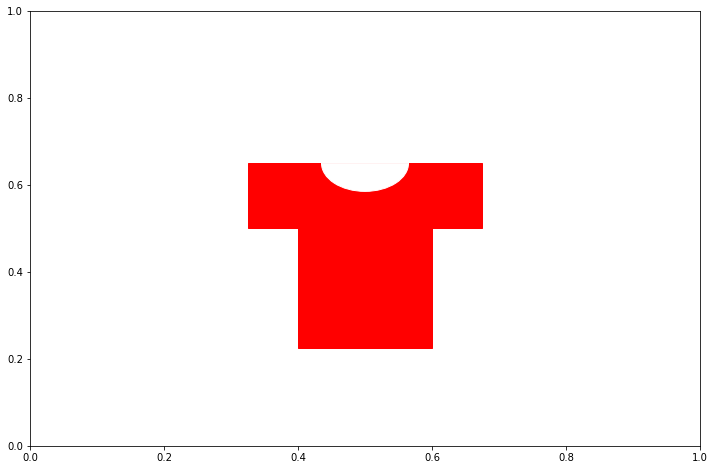

In [87]:
figure, axes = plt.subplots(figsize = (12,8)) 

jersey = [
    Rectangle([0.4,0.225], width=0.2, height=0.275, fill=True, ec = "red", fc ="red"),
    Rectangle([0.325,0.5], width=0.35, height=0.15, fill=True, ec = "red", fc = "red"),
    Wedge((0.5,0.65),r=0.065, theta1=180, theta2=0, ec="white", fill = True, fc = 'white')

]
for i in jersey:
    axes.add_artist(i) 
plt.show()

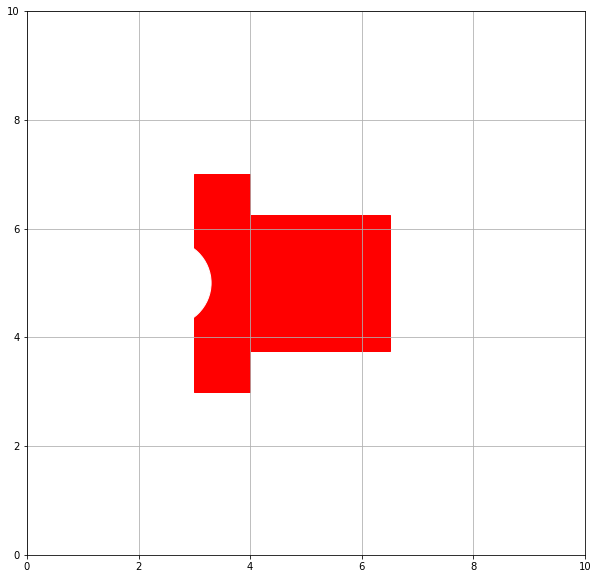

In [119]:
figure, axes = plt.subplots(figsize = (10,10))
axes.grid(True)
plt.ylim(0, 10)
plt.xlim(0, 10)
x0, y0 = 5,4.75
jersey = [
    Rectangle([x0-1,y0-1], width=2.5, height=2.5, fill=True, ec = "red", fc ="red"),
    Rectangle([x0-2,y0-1.75], width=1, height=4, fill=True, ec = "red", fc ="red"),
    Wedge((x0-2.5,y0+0.25),r=0.8, theta1=270, theta2=90, ec="white", fill = True, fc = 'white')

]
for i in jersey:
    axes.add_artist(i) 
plt.show()